# **Zadanie č.1 (I-SUNS)**

## **Analýza datasetu:**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, f1_score, r2_score
import locale as loc
import ast

pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_df = pd.read_csv('/content/drive/MyDrive/SUNS/datasets/z1_train.csv')
test_data_df = pd.read_csv('/content/drive/MyDrive/SUNS/datasets/z1_test.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


---
### **Trénovacie dáta:**

#### **Povodné dáta:**

In [ ]:
train_data_df

,D_appid,D_name,positive,negative,score,D_reviews,D_owners,coming_soon,D_release_date,D_genre,VYMAZAT_price,is_free,ccu,english,languages,D_tags,D_developer,D_publisher,publisher_est,developer_est,self_published,has_dlc,has_website_linked,has_controller_support,is_single_player,is_multi_player,is_early_access,mature_content,Addictive,Beautiful,Classic,Competitive,Cult Classic,Difficult,Emotional,Epic,Funny,Lore-Rich,Masterpiece,Replay Value,Short,Well-Written
0,10,Counter-Strike,193046,4940,0.975049,Overwhelmingly positive,"10,000,000 .. 20,000,000",False,"1 Nov, 2000",Action,999.0,False,16360,True,8.0,"{'Action': 5379, 'FPS': 4801, 'Multiplayer': 3...",Valve,Valve,33.0,29.0,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
1,20,Team Fortress Classic,5412,895,0.858094,Very Positive,"5,000,000 .. 10,000,000",False,"1 Apr, 1999",Action,499.0,False,87,True,9.0,"{'Action': 745, 'FPS': 306, 'Multiplayer': 257...",Valve,Valve,33.0,29.0,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False
2,30,Day of Defeat,5003,556,0.899982,Very Positive,"5,000,000 .. 10,000,000",False,"1 May, 2003",Action,499.0,False,122,True,5.0,"{'FPS': 787, 'World War II': 248, 'Multiplayer...",Valve,Valve,33.0,29.0,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
3,40,Deathmatch Classic,1852,412,0.818021,Very Positive,"5,000,000 .. 10,000,000",False,"1 Jun, 2001",Action,499.0,False,7,True,9.0,"{'Action': 629, 'FPS': 139, 'Classic': 107, 'M...",Valve,Valve,33.0,29.0,True,False,False,False,False,True,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False
4,50,Half-Life: Opposing Force,13262,662,0.952456,Overwhelmingly positive,"5,000,000 .. 10,000,000",False,"1 Nov, 1999",Action,499.0,False,122,True,4.0,"{'FPS': 881, 'Action': 322, 'Classic': 251, 'S...",Gearbox Software,Valve,33.0,13.0,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62864,1899430,NaN,0,0,NaN,Negative,"0 .. 20,000",True,NaN,NaN,NaN,False,0,NaN,NaN,[],NaN,NaN,NaN,NaN,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62865,1899990,GEHENA,0,0,NaN,Negative,"0 .. 20,000",True,NaN,NaN,NaN,False,0,NaN,NaN,[],NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62866,1900820,NaN,0,0,NaN,Negative,"0 .. 20,000",True,NaN,NaN,NaN,False,0,NaN,NaN,[],NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62867,1901700,TRADER LIFE SIMULATOR 2,0,0,NaN,Negative,"0 .. 20,000",True,NaN,NaN,NaN,False,0,NaN,NaN,[],NaN,NaN,NaN,NaN,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

D_appid : 0/62869
D_name : 96/62869
positive : 0/62869
negative : 0/62869
score : 15442/62869
D_reviews : 0/62869
D_owners : 0/62869
coming_soon : 53/62869
D_release_date : 10546/62869
D_genre : 7245/62869
VYMAZAT_price : 7060/62869
is_free : 0/62869
ccu : 0/62869
english : 7086/62869
languages : 7086/62869
D_tags : 0/62869
D_developer : 7193/62869
D_publisher : 7159/62869
publisher_est : 7159/62869
developer_est : 7193/62869
self_published : 0/62869
has_dlc : 0/62869
has_website_linked : 0/62869
has_controller_support : 0/62869
is_single_player : 156/62869
is_multi_player : 156/62869
is_early_access : 0/62869
mature_content : 0/62869
Addictive : 0/62869
Beautiful : 0/62869
Classic : 0/62869
Competitive : 0/62869
Cult Classic : 0/62869
Difficult : 0/62869
Emotional : 0/62869
Epic : 0/62869
Funny : 0/62869
Lore-Rich : 0/62869
Masterpiece : 0/62869
Replay Value : 0/62869
Short : 0/62869
Well-Written : 0/62869


#### **Odstránenie a premenovanie stĺpcov:**

In [ ]:
train_data_df = train_data_df.drop('D_appid', axis=1)
train_data_df = train_data_df.drop('D_name', axis=1)
train_data_df = train_data_df.drop('VYMAZAT_price', axis=1)
train_data_df = train_data_df.drop('positive', axis=1)
train_data_df = train_data_df.drop('negative', axis=1)
train_data_df = train_data_df.drop('D_developer', axis=1)
train_data_df = train_data_df.drop('D_publisher', axis=1)

train_data_df = train_data_df.rename({'Short': 'Short_'}, axis=1)

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 15442/62869
D_reviews : 0/62869
D_owners : 0/62869
coming_soon : 53/62869
D_release_date : 10546/62869
D_genre : 7245/62869
is_free : 0/62869
ccu : 0/62869
english : 7086/62869
languages : 7086/62869
D_tags : 0/62869
publisher_est : 7159/62869
developer_est : 7193/62869
self_published : 0/62869
has_dlc : 0/62869
has_website_linked : 0/62869
has_controller_support : 0/62869
is_single_player : 156/62869
is_multi_player : 156/62869
is_early_access : 0/62869
mature_content : 0/62869
Addictive : 0/62869
Beautiful : 0/62869
Classic : 0/62869
Competitive : 0/62869
Cult Classic : 0/62869
Difficult : 0/62869
Emotional : 0/62869
Epic : 0/62869
Funny : 0/62869
Lore-Rich : 0/62869
Masterpiece : 0/62869
Replay Value : 0/62869
Short_ : 0/62869
Well-Written : 0/62869


#### **Odstránenie zázanmov bez uvedemých žánrov:**

In [ ]:
train_data_df = train_data_df[train_data_df['D_genre'].notna()]

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 8364/55624
D_reviews : 0/55624
D_owners : 0/55624
coming_soon : 47/55624
D_release_date : 4755/55624
D_genre : 0/55624
is_free : 0/55624
ccu : 0/55624
english : 5/55624
languages : 5/55624
D_tags : 0/55624
publisher_est : 79/55624
developer_est : 16/55624
self_published : 0/55624
has_dlc : 0/55624
has_website_linked : 0/55624
has_controller_support : 0/55624
is_single_player : 111/55624
is_multi_player : 111/55624
is_early_access : 0/55624
mature_content : 0/55624
Addictive : 0/55624
Beautiful : 0/55624
Classic : 0/55624
Competitive : 0/55624
Cult Classic : 0/55624
Difficult : 0/55624
Emotional : 0/55624
Epic : 0/55624
Funny : 0/55624
Lore-Rich : 0/55624
Masterpiece : 0/55624
Replay Value : 0/55624
Short_ : 0/55624
Well-Written : 0/55624


#### **Odstránenie zázanmov bez infromácie o single-player móde:**

In [ ]:
train_data_df = train_data_df[train_data_df['is_single_player'].notna()]

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 8352/55513
D_reviews : 0/55513
D_owners : 0/55513
coming_soon : 0/55513
D_release_date : 4701/55513
D_genre : 0/55513
is_free : 0/55513
ccu : 0/55513
english : 4/55513
languages : 4/55513
D_tags : 0/55513
publisher_est : 78/55513
developer_est : 15/55513
self_published : 0/55513
has_dlc : 0/55513
has_website_linked : 0/55513
has_controller_support : 0/55513
is_single_player : 0/55513
is_multi_player : 0/55513
is_early_access : 0/55513
mature_content : 0/55513
Addictive : 0/55513
Beautiful : 0/55513
Classic : 0/55513
Competitive : 0/55513
Cult Classic : 0/55513
Difficult : 0/55513
Emotional : 0/55513
Epic : 0/55513
Funny : 0/55513
Lore-Rich : 0/55513
Masterpiece : 0/55513
Replay Value : 0/55513
Short_ : 0/55513
Well-Written : 0/55513


#### **Odstránenie zázanmov bez informácie o počte jazykov:**

In [ ]:
train_data_df = train_data_df[train_data_df['languages'].notna()]

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 8350/55509
D_reviews : 0/55509
D_owners : 0/55509
coming_soon : 0/55509
D_release_date : 4701/55509
D_genre : 0/55509
is_free : 0/55509
ccu : 0/55509
english : 0/55509
languages : 0/55509
D_tags : 0/55509
publisher_est : 78/55509
developer_est : 15/55509
self_published : 0/55509
has_dlc : 0/55509
has_website_linked : 0/55509
has_controller_support : 0/55509
is_single_player : 0/55509
is_multi_player : 0/55509
is_early_access : 0/55509
mature_content : 0/55509
Addictive : 0/55509
Beautiful : 0/55509
Classic : 0/55509
Competitive : 0/55509
Cult Classic : 0/55509
Difficult : 0/55509
Emotional : 0/55509
Epic : 0/55509
Funny : 0/55509
Lore-Rich : 0/55509
Masterpiece : 0/55509
Replay Value : 0/55509
Short_ : 0/55509
Well-Written : 0/55509


#### **Odstránenie zázanmov bez informácie o dátume vydania:**

In [ ]:
train_data_df = train_data_df[train_data_df['D_release_date'].notna()]

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 3693/50808
D_reviews : 0/50808
D_owners : 0/50808
coming_soon : 0/50808
D_release_date : 0/50808
D_genre : 0/50808
is_free : 0/50808
ccu : 0/50808
english : 0/50808
languages : 0/50808
D_tags : 0/50808
publisher_est : 61/50808
developer_est : 11/50808
self_published : 0/50808
has_dlc : 0/50808
has_website_linked : 0/50808
has_controller_support : 0/50808
is_single_player : 0/50808
is_multi_player : 0/50808
is_early_access : 0/50808
mature_content : 0/50808
Addictive : 0/50808
Beautiful : 0/50808
Classic : 0/50808
Competitive : 0/50808
Cult Classic : 0/50808
Difficult : 0/50808
Emotional : 0/50808
Epic : 0/50808
Funny : 0/50808
Lore-Rich : 0/50808
Masterpiece : 0/50808
Replay Value : 0/50808
Short_ : 0/50808
Well-Written : 0/50808


#### **Odstránenie zázanmov bez informácie o ... a ...:**

In [ ]:
train_data_df = train_data_df[train_data_df['publisher_est'].notna()]
train_data_df = train_data_df[train_data_df['developer_est'].notna()]

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 3685/50745
D_reviews : 0/50745
D_owners : 0/50745
coming_soon : 0/50745
D_release_date : 0/50745
D_genre : 0/50745
is_free : 0/50745
ccu : 0/50745
english : 0/50745
languages : 0/50745
D_tags : 0/50745
publisher_est : 0/50745
developer_est : 0/50745
self_published : 0/50745
has_dlc : 0/50745
has_website_linked : 0/50745
has_controller_support : 0/50745
is_single_player : 0/50745
is_multi_player : 0/50745
is_early_access : 0/50745
mature_content : 0/50745
Addictive : 0/50745
Beautiful : 0/50745
Classic : 0/50745
Competitive : 0/50745
Cult Classic : 0/50745
Difficult : 0/50745
Emotional : 0/50745
Epic : 0/50745
Funny : 0/50745
Lore-Rich : 0/50745
Masterpiece : 0/50745
Replay Value : 0/50745
Short_ : 0/50745
Well-Written : 0/50745


#### **Dopočítanie priemernej hodnoty pre chýbajúce záznamy skóre:**

In [ ]:
score_mean_train_data_df = train_data_df['score'].mean()
train_data_df['score'] = train_data_df['score'].fillna(score_mean_train_data_df)

In [ ]:
for column in train_data_df:
  print(column + ' : ' + str(train_data_df[column].isna().sum()) + '/' +  str(train_data_df.shape[0]))

score : 0/50745
D_reviews : 0/50745
D_owners : 0/50745
coming_soon : 0/50745
D_release_date : 0/50745
D_genre : 0/50745
is_free : 0/50745
ccu : 0/50745
english : 0/50745
languages : 0/50745
D_tags : 0/50745
publisher_est : 0/50745
developer_est : 0/50745
self_published : 0/50745
has_dlc : 0/50745
has_website_linked : 0/50745
has_controller_support : 0/50745
is_single_player : 0/50745
is_multi_player : 0/50745
is_early_access : 0/50745
mature_content : 0/50745
Addictive : 0/50745
Beautiful : 0/50745
Classic : 0/50745
Competitive : 0/50745
Cult Classic : 0/50745
Difficult : 0/50745
Emotional : 0/50745
Epic : 0/50745
Funny : 0/50745
Lore-Rich : 0/50745
Masterpiece : 0/50745
Replay Value : 0/50745
Short_ : 0/50745
Well-Written : 0/50745


#### **Škálovanie hodnôt hodnotení:**

In [ ]:
train_data_df['D_reviews'].unique()

array(['Overwhelmingly positive', 'Very Positive', 'Mostly Positive',
       'Negative', 'Mixed', 'Very Negative', 'Mostly Negative',
       'Positive', 'Overwhelmingly Negative'], dtype=object)

In [ ]:
train_data_df['D_reviews'] = train_data_df['D_reviews'].mask(train_data_df['D_reviews'] == 'Overwhelmingly positive', 1.0)
train_data_df['D_reviews'] = train_data_df['D_reviews'].mask(train_data_df['D_reviews'] == 'Very Positive', 0.9)
train_data_df['D_reviews'] = train_data_df['D_reviews'].mask(train_data_df['D_reviews'] == 'Positive', 0.8)
train_data_df['D_reviews'] = train_data_df['D_reviews'].mask(train_data_df['D_reviews'] == 'Mostly Positive', 0.7)
train_data_df['D_reviews'] = train_data_df['D_reviews'].mask(train_data_df['D_reviews'] == 'Mixed', 0.5)
train_data_df['D_reviews'] = train_data_df['D_reviews'].mask(train_data_df['D_reviews'] == 'Mostly Negative', 0.3)
train_data_df['D_reviews'] = train_data_df['D_reviews'].mask(train_data_df['D_reviews'] == 'Negative', 0.2)
train_data_df['D_reviews'] = train_data_df['D_reviews'].mask(train_data_df['D_reviews'] == 'Very Negative', 0.1)
train_data_df['D_reviews'] = train_data_df['D_reviews'].mask(train_data_df['D_reviews'] == 'Overwhelmingly Negative', 0.0)

In [ ]:
train_data_df['D_reviews'].unique()

array([1.0, 0.9, 0.7, 0.2, 0.5, 0.1, 0.3, 0.8, 0.0], dtype=object)

#### **Extrakcia počtu vlastníkov:**

In [ ]:
loc.setlocale(loc.LC_ALL, 'en_US.UTF-8' ) 

owners_from = []
owners_to = []

for row in train_data_df['D_owners']:
  splitted_row = row.split(' .. ')
  owners_from.append(loc.atoi(splitted_row[0]))
  owners_to.append(loc.atoi(splitted_row[1]))

train_data_df['owners_from'] = owners_from
train_data_df['owners_to'] = owners_to

train_data_df = train_data_df.drop('D_owners', axis=1)

#### **Extrakcia roku vydania z dátumu vydania:**

In [ ]:
release_year = []

for row in train_data_df['D_release_date']:
  splitted_row = row.split(', ')
  if (len(splitted_row) != 2):
    splitted_row = row.split(' ')
  release_year.append(int(splitted_row[1]))

train_data_df['release_year'] = release_year

train_data_df = train_data_df.drop('D_release_date', axis=1)

#### **Extrakcia žánrov a početnosti v tag-och:**

In [ ]:
genre = []

for row in train_data_df['D_genre']:
  splitted_row = row.split(', ')
  genre.extend(splitted_row)

genre = list(dict.fromkeys(genre))

In [ ]:
genres = []

for row in train_data_df['D_tags']:
  splitted_row = ast.literal_eval(row)
  if (type(splitted_row) is not dict):
    splitted_row = {}
  tmp_row = []
  for tmp_genre in genre:
    tmp_row.append(splitted_row.get(tmp_genre, 0))
  genres.append(tmp_row)

genre_df = pd.DataFrame(genres, columns = genre)

In [ ]:
genre_df

,Action,Free to Play,Adventure,Indie,Strategy,RPG,Casual,Simulation,Racing,Massively Multiplayer,Sports,Early Access,Violent,Gore,Sexual Content,Nudity,Audio Production,Utilities,Education,Design & Illustration,Animation & Modeling,Software Training,Web Publishing,Accounting,Video Production,Game Development,Photo Editing,Movie,Documentary,Episodic,Short,Tutorial,360 V
0,5379,0,0,0,604,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,745,0,0,0,0,0,0,0,0,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,159,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,629,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,322,0,114,0,0,0,0,0,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50740,0,0,0,0,0,0,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50741,440,0,0,0,424,0,434,429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50742,463,0,457,0,446,0,453,449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data_df = train_data_df.reset_index(drop=True)

train_data_df = pd.concat([train_data_df, genre_df], axis = 1)

train_data_df = train_data_df.drop('D_genre', axis=1)
train_data_df = train_data_df.drop('D_tags', axis=1)

In [ ]:
train_data_df.loc[train_data_df['Free to Play'] != 0]

,score,D_reviews,coming_soon,is_free,ccu,english,languages,publisher_est,developer_est,self_published,has_dlc,has_website_linked,has_controller_support,is_single_player,is_multi_player,is_early_access,mature_content,Addictive,Beautiful,Classic,Competitive,Cult Classic,Difficult,Emotional,Epic,Funny,Lore-Rich,Masterpiece,Replay Value,Short_,Well-Written,owners_from,owners_to,release_year,Action,Free to Play,Adventure,Indie,Strategy,RPG,Casual,Simulation,Racing,Massively Multiplayer,Sports,Early Access,Violent,Gore,Sexual Content,Nudity,Audio Production,Utilities,Education,Design & Illustration,Animation & Modeling,Software Training,Web Publishing,Accounting,Video Production,Game Development,Photo Editing,Movie,Documentary,Episodic,Short,Tutorial,360 V
13,0.877490,0.9,False,True,31,True,9.0,33.0,29.0,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,20000000,50000000,2005,357,54,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,214,0,0
18,0.936969,0.9,False,True,71402,True,26.0,33.0,29.0,True,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,50000000,100000000,2007,11401,61321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0.947745,0.9,False,True,64,True,1.0,33.0,29.0,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2000000,5000000,2010,585,3684,107,0,110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
107,0.932355,0.9,False,True,13,True,1.0,21.0,23.0,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,200000,500000,2007,8,26,0,0,0,0,66,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157,0.882609,0.9,False,True,17,True,1.0,5.0,5.0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,20000,50000,2006,0,8,0,26,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47775,0.879808,0.9,False,True,5,True,10.0,2.0,2.0,True,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,20000,2022,193,221,189,199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48506,0.776119,0.7,False,False,10,True,1.0,1.0,1.0,True,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,20000,2021,146,37,0,55,0,0,51,0,0,0,0,182,0,0,0,0,0,0,0,212,0,0,0,0,0,61,0,0,0,0,0,0,0
48626,0.880597,0.9,False,False,1,True,1.0,1.0,1.0,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,20000,2021,0,67,85,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48678,1.000000,0.8,False,False,0,True,1.0,3.0,3.0,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,20000,2021,180,20,0,31,0,0,174,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### **Nahradenie True a False numerickými hodnotami 0 a 1:**

In [ ]:
train_data_df = train_data_df.replace(True, 1)
train_data_df = train_data_df.replace(False, 0)

#### **Normalizácia dát:**

In [ ]:
normalized_train_data_df = train_data_df.copy()

normalized_train_data_df['ccu'] = (normalized_train_data_df['ccu'] - normalized_train_data_df['ccu'].min()) / (normalized_train_data_df['ccu'].max() - normalized_train_data_df['ccu'].min())
normalized_train_data_df['publisher_est'] = (normalized_train_data_df['publisher_est'] - normalized_train_data_df['publisher_est'].min()) / (normalized_train_data_df['publisher_est'].max() - normalized_train_data_df['publisher_est'].min())
normalized_train_data_df['developer_est'] = (normalized_train_data_df['developer_est'] - normalized_train_data_df['developer_est'].min()) / (normalized_train_data_df['developer_est'].max() - normalized_train_data_df['developer_est'].min())
normalized_train_data_df['owners_from'] = (normalized_train_data_df['owners_from'] - normalized_train_data_df['owners_from'].min()) / (normalized_train_data_df['owners_to'].max() - normalized_train_data_df['owners_from'].min())
normalized_train_data_df['owners_to'] = (normalized_train_data_df['owners_to'] - normalized_train_data_df['owners_from'].min()) / (normalized_train_data_df['owners_to'].max() - normalized_train_data_df['owners_from'].min())

#### **Extrakcia označení vzoriek:**

In [ ]:
train_target_df = normalized_train_data_df[['is_free']]
train_data_df = normalized_train_data_df.drop('is_free', axis=1)

In [ ]:
train_target_df

,is_free
0,0
1,0
2,0
3,0
4,0
...,...
50740,0
50741,0
50742,0
50743,0


In [ ]:
train_data_df

,score,D_reviews,coming_soon,ccu,english,languages,publisher_est,developer_est,self_published,has_dlc,has_website_linked,has_controller_support,is_single_player,is_multi_player,is_early_access,mature_content,Addictive,Beautiful,Classic,Competitive,Cult Classic,Difficult,Emotional,Epic,Funny,Lore-Rich,Masterpiece,Replay Value,Short_,Well-Written,owners_from,owners_to,release_year,Action,Free to Play,Adventure,Indie,Strategy,RPG,Casual,Simulation,Racing,Massively Multiplayer,Sports,Early Access,Violent,Gore,Sexual Content,Nudity,Audio Production,Utilities,Education,Design & Illustration,Animation & Modeling,Software Training,Web Publishing,Accounting,Video Production,Game Development,Photo Editing,Movie,Documentary,Episodic,Short,Tutorial,360 V
0,0.975049,1.0,0,0.042734,1,8.0,0.079404,0.204380,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.10,0.2000,2000,5379,0,0,0,604,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.858094,0.9,0,0.000227,1,9.0,0.079404,0.204380,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0.05,0.1000,1999,745,0,0,0,0,0,0,0,0,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.899982,0.9,0,0.000319,1,5.0,0.079404,0.204380,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.05,0.1000,2003,159,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.818021,0.9,0,0.000018,1,9.0,0.079404,0.204380,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0.05,0.1000,2001,629,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.952456,1.0,0,0.000319,1,4.0,0.079404,0.087591,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.05,0.1000,1999,322,0,114,0,0,0,0,0,0,0,0,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50740,1.000000,0.8,0,0.000000,1,1.0,0.024814,0.072993,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0002,2022,0,0,0,0,0,0,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50741,0.818182,0.8,0,0.000000,1,29.0,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0002,2022,440,0,0,0,424,0,434,429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50742,0.500000,0.5,0,0.000003,1,29.0,0.000000,0.000000,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0002,2022,463,0,457,0,446,0,453,449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50743,0.738866,0.2,0,0.000000,1,1.0,0.138958,0.160584,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0002,2022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Analýza dát (EDA):**

#### **Analýza č.0 - Korelačná matica:**

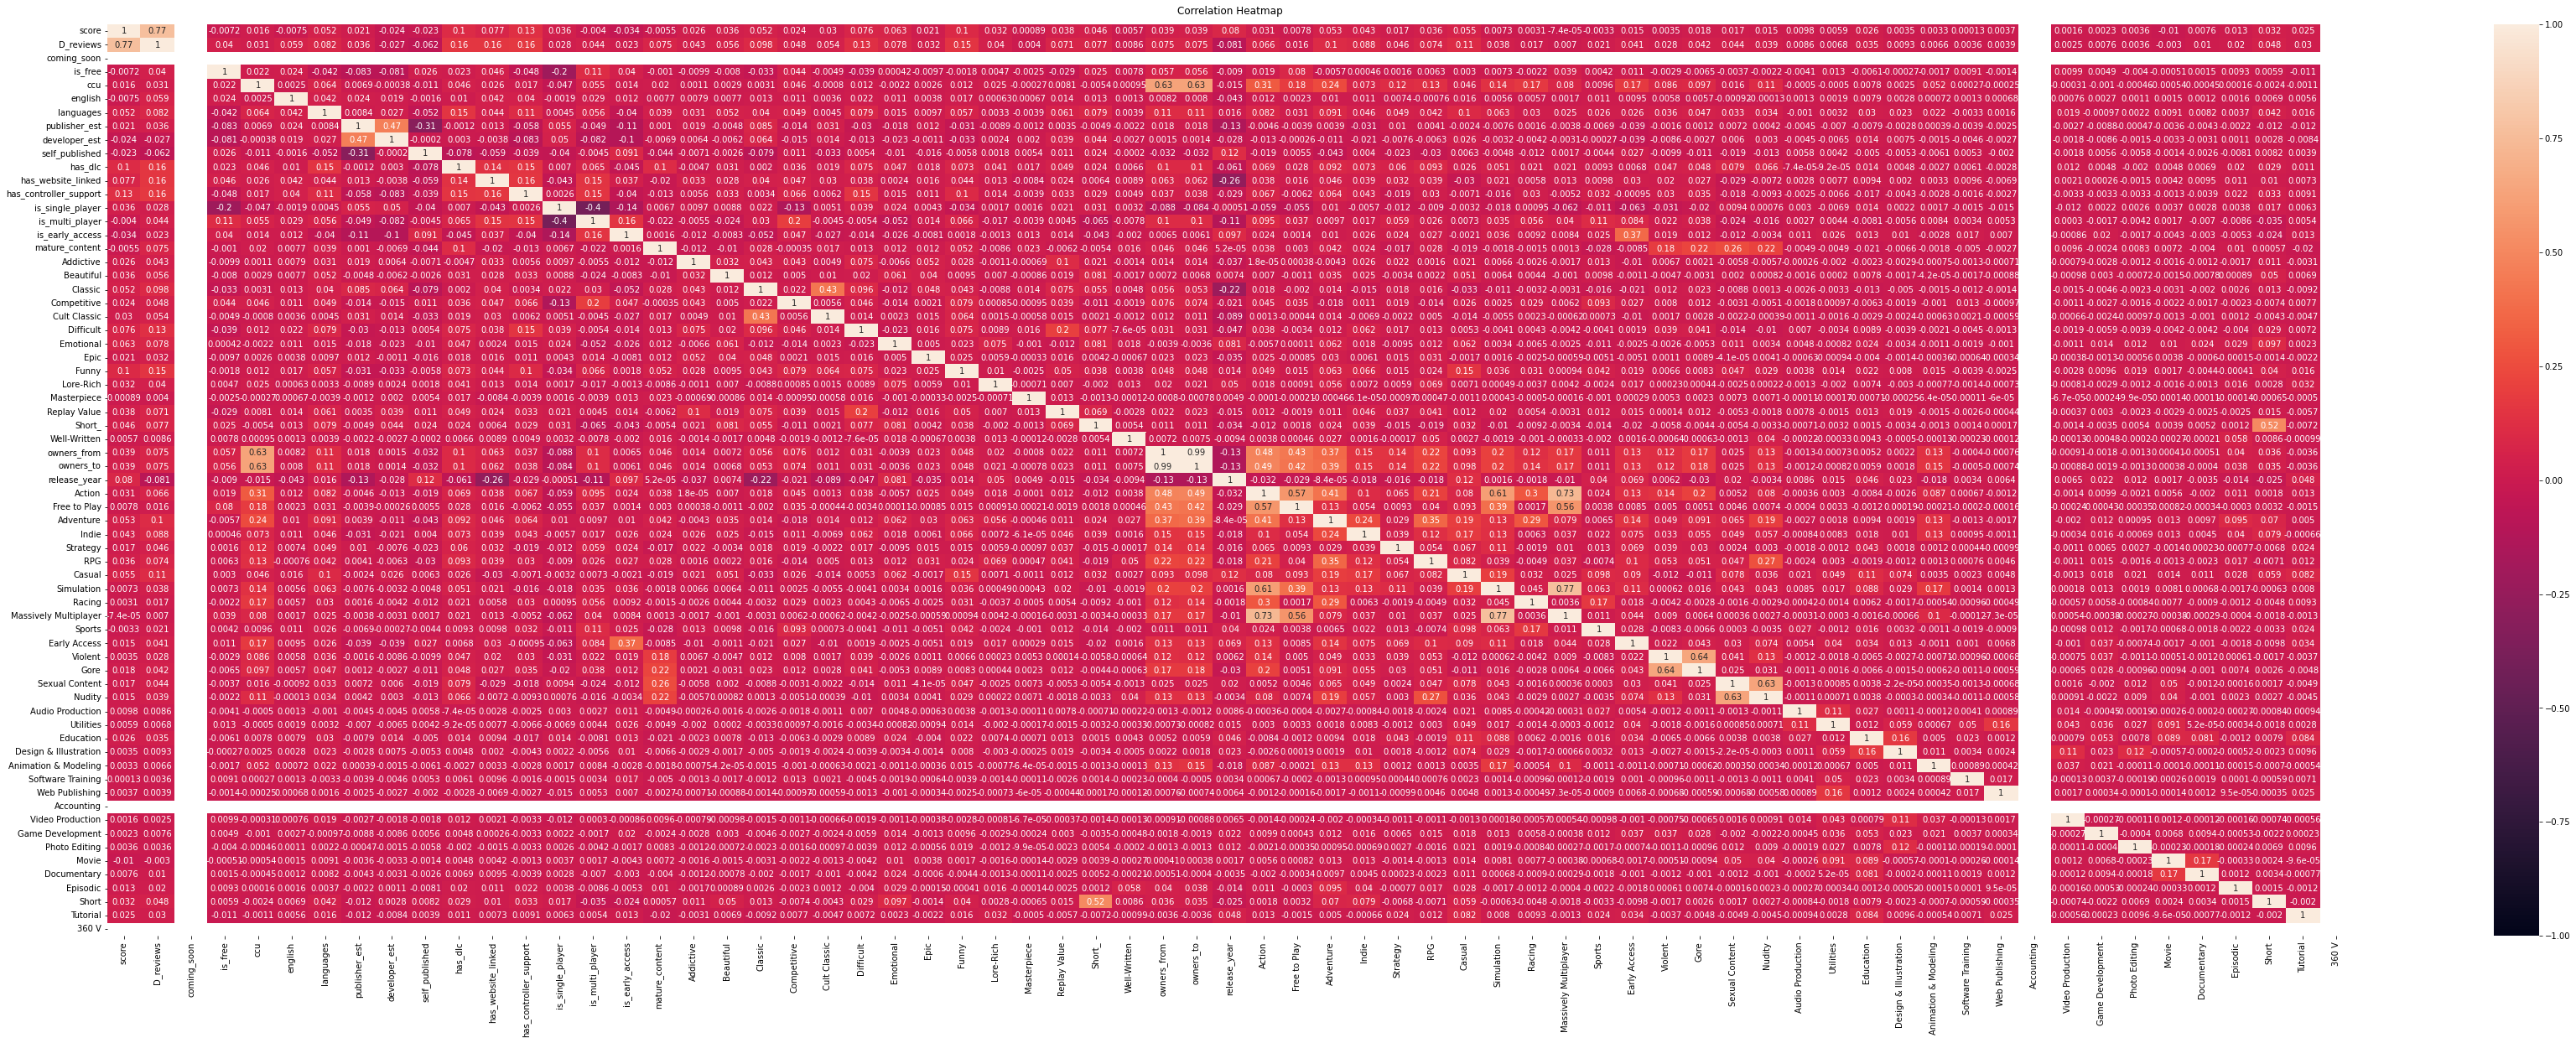

In [ ]:
plt.figure(figsize=(60, 20))
heatmap = sb.heatmap(normalized_train_data_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### **Analýza č.1 - Počet hier vydaných v priebehu času:**

In [ ]:
release_year_group_df = train_data_df.groupby(['release_year'])['release_year'].count()
release_years = release_year_group_df.keys().tolist()
game_count = release_year_group_df.values.tolist()

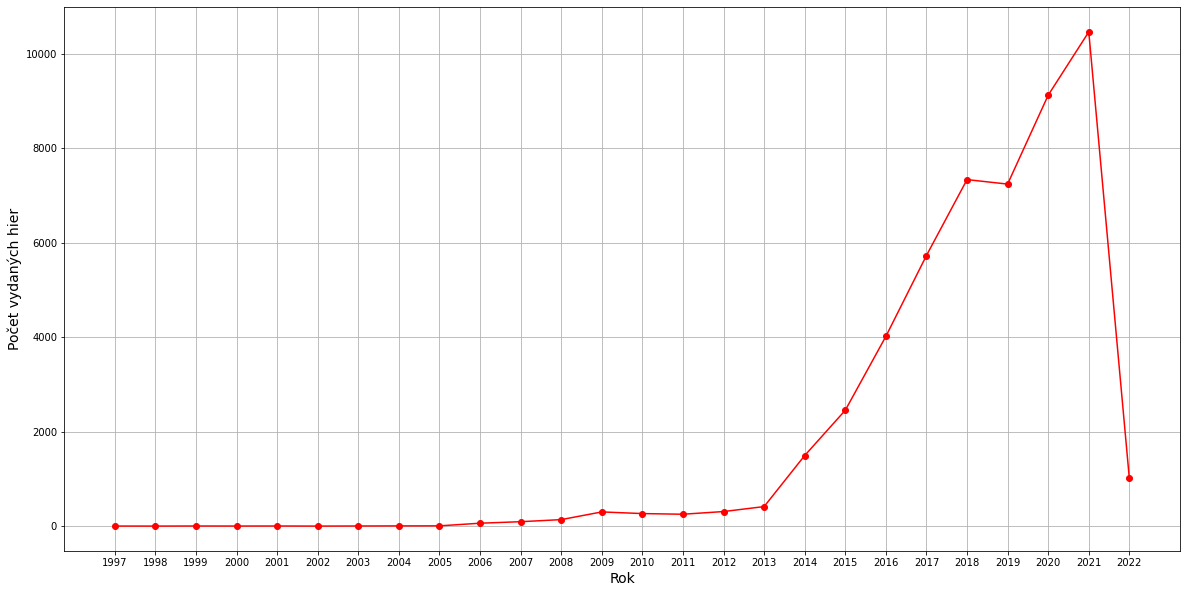

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(release_years, game_count, color='red', marker='o')
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Počet vydaných hier', fontsize=14)
plt.xticks(release_years)
plt.grid()
plt.show()

#### **Analýza č.2 - Počet hier jednotlivých žánrov:**

In [ ]:
genres_group = genre
genres_group_count = []
for tmp_genre in genres_group:
  count = len(train_data_df[train_data_df[tmp_genre] != 0])
  genres_group_count.append(count)

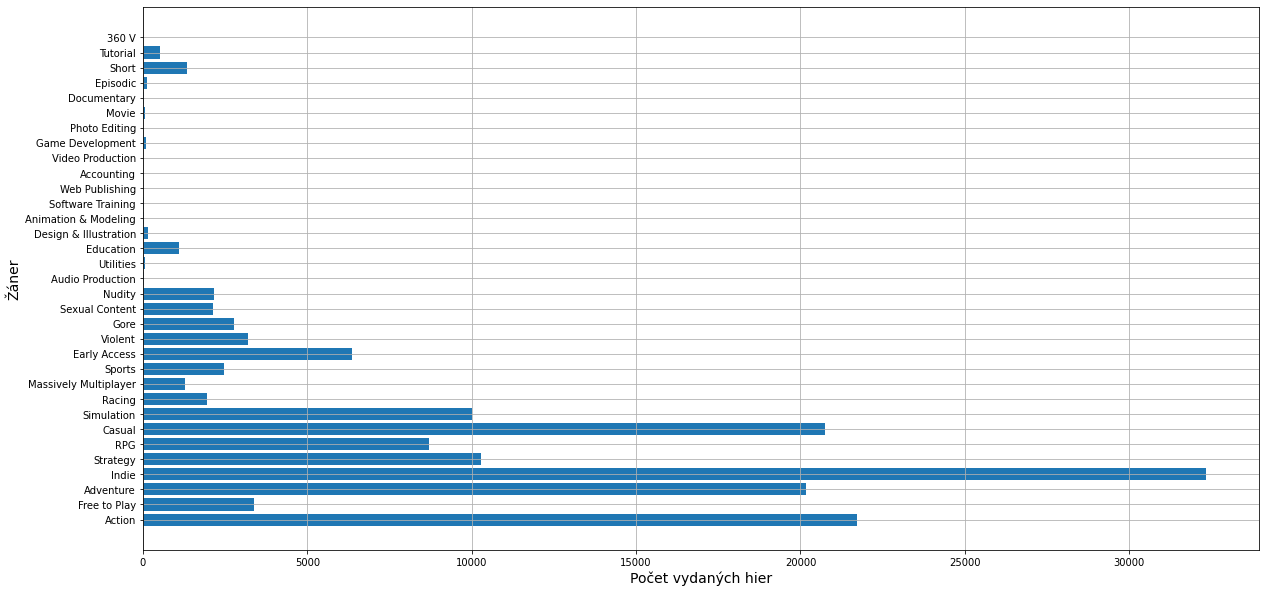

In [ ]:
plt.figure(figsize=(20, 10))
plt.barh(genres_group, genres_group_count)
plt.xlabel('Počet vydaných hier', fontsize=14)
plt.ylabel('Žáner', fontsize=14)
plt.grid()
plt.show()

#### **Analýza č.3 - Počet hier vydaných v prebehu času v najpočetnejších žánroch:**

In [ ]:
tmp1_train_data_df = train_data_df[train_data_df['Indie'] != 0]
tmp1_release_year_group_df = tmp1_train_data_df.groupby(['release_year'])['release_year'].count()
tmp1_release_years = tmp1_release_year_group_df.keys().tolist()
tmp1_game_count = tmp1_release_year_group_df.values.tolist()

tmp2_train_data_df = train_data_df[train_data_df['Action'] != 0]
tmp2_release_year_group_df = tmp2_train_data_df.groupby(['release_year'])['release_year'].count()
tmp2_release_years = tmp2_release_year_group_df.keys().tolist()
tmp2_game_count = tmp2_release_year_group_df.values.tolist()

tmp3_train_data_df = train_data_df[train_data_df['Casual'] != 0]
tmp3_release_year_group_df = tmp3_train_data_df.groupby(['release_year'])['release_year'].count()
tmp3_release_years = tmp3_release_year_group_df.keys().tolist()
tmp3_game_count = tmp3_release_year_group_df.values.tolist()

tmp4_train_data_df = train_data_df[train_data_df['Adventure'] != 0]
tmp4_release_year_group_df = tmp4_train_data_df.groupby(['release_year'])['release_year'].count()
tmp4_release_years = tmp4_release_year_group_df.keys().tolist()
tmp4_game_count = tmp4_release_year_group_df.values.tolist()

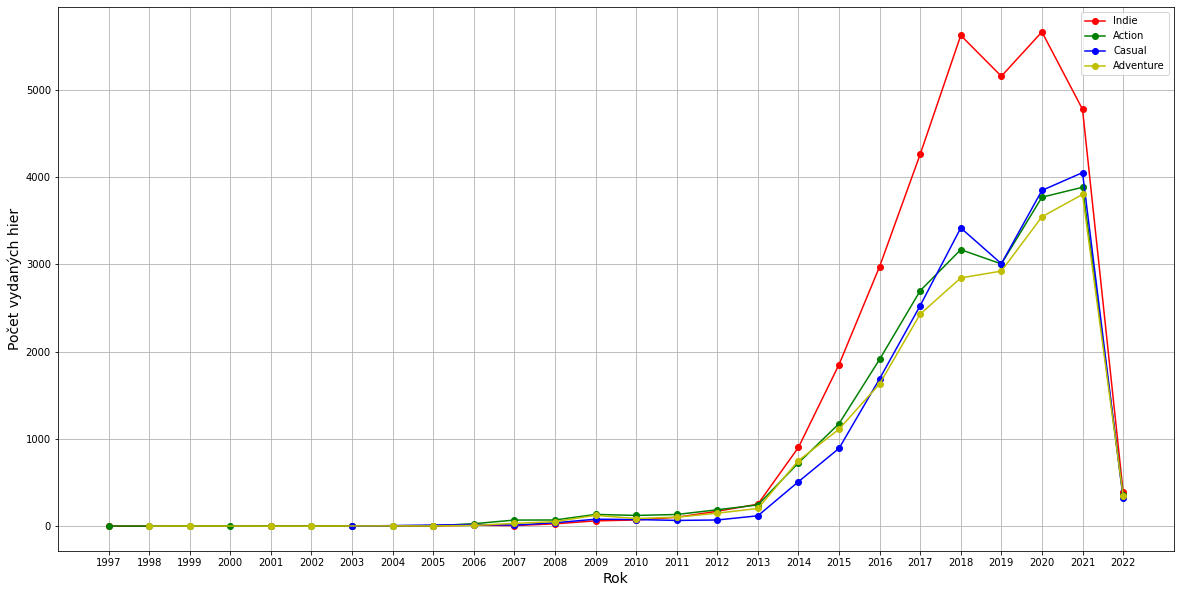

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(tmp1_release_years, tmp1_game_count, color='r', marker='o', label='Indie')
plt.plot(tmp2_release_years, tmp2_game_count, color='g', marker='o', label='Action')
plt.plot(tmp3_release_years, tmp3_game_count, color='b', marker='o', label='Casual')
plt.plot(tmp4_release_years, tmp4_game_count, color='y', marker='o', label='Adventure')
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Počet vydaných hier', fontsize=14)
plt.xticks(release_years)
plt.grid()
plt.legend()
plt.show()

#### **Analýza č.4 - Počet hier vydaných v prebehu času podľa finančného modelu:**

In [ ]:
tmp1_train_data_df = train_data_df[train_target_df['is_free'] == 1]
tmp1_release_year_group_df = tmp1_train_data_df.groupby(['release_year'])['release_year'].count()
tmp1_release_years = tmp1_release_year_group_df.keys().tolist()
tmp1_game_count = tmp1_release_year_group_df.values.tolist()

tmp2_train_data_df = train_data_df[train_target_df['is_free'] == 0]
tmp2_release_year_group_df = tmp2_train_data_df.groupby(['release_year'])['release_year'].count()
tmp2_release_years = tmp2_release_year_group_df.keys().tolist()
tmp2_game_count = tmp2_release_year_group_df.values.tolist()

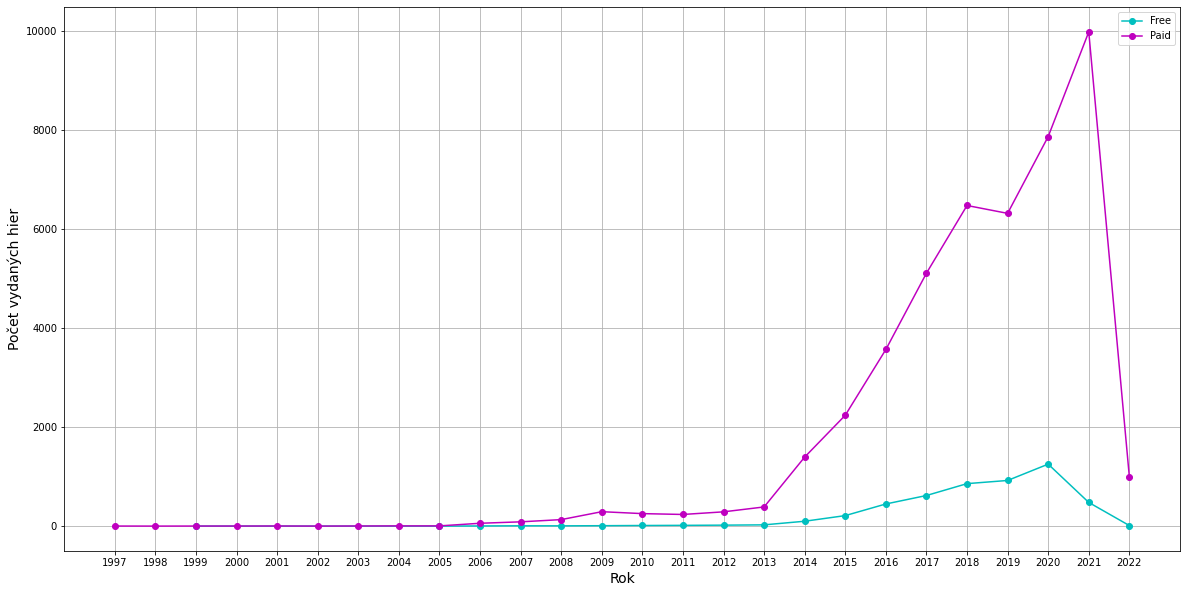

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(tmp1_release_years, tmp1_game_count, color='c', marker='o', label='Free')
plt.plot(tmp2_release_years, tmp2_game_count, color='m', marker='o', label='Paid')
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Počet vydaných hier', fontsize=14)
plt.xticks(release_years)
plt.grid()
plt.legend()
plt.show()

#### **Analýza č.5 - Počet hier jednotlivých žánrov podľa finančého modelu:**

In [ ]:
genres_group = genre

free_train_data_df = train_data_df[train_target_df['is_free'] == 1]
genres_group_count_free = []
for tmp_genre in genres_group:
  count = len(free_train_data_df[free_train_data_df[tmp_genre] != 0])
  genres_group_count_free.append(count)

paid_train_data_df = train_data_df[train_target_df['is_free'] == 0]
genres_group_count_paid = []
for tmp_genre in genres_group:
  count = len(paid_train_data_df[paid_train_data_df[tmp_genre] != 0])
  genres_group_count_paid.append(count)

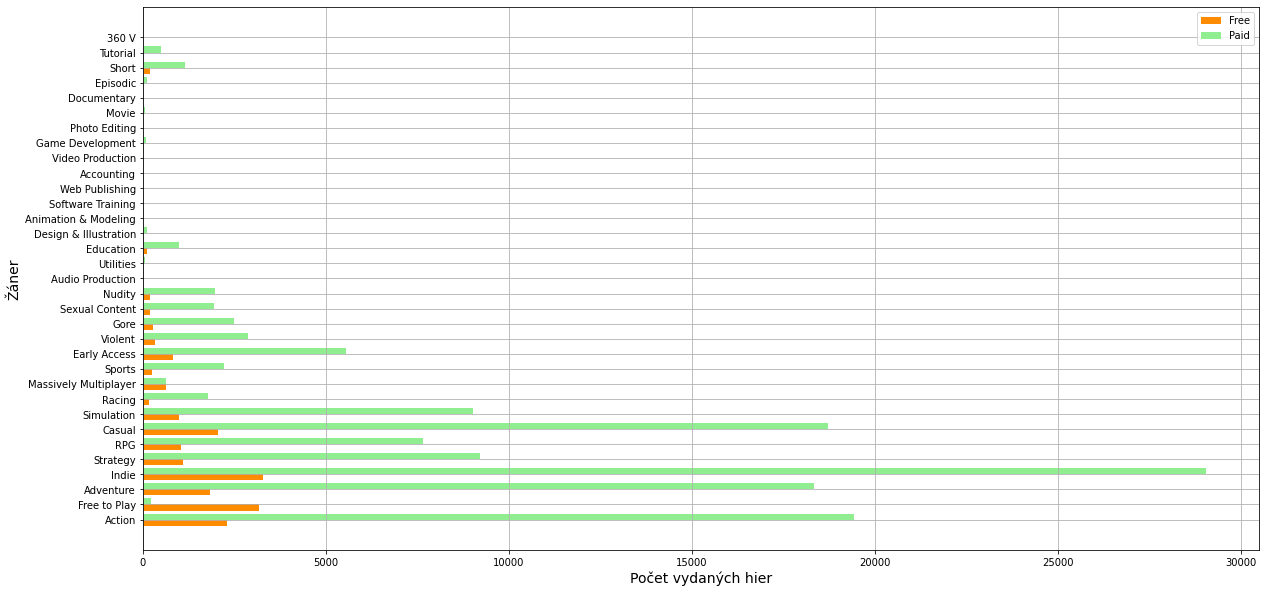

In [ ]:
plt.figure(figsize=(20, 10))
plt.barh(np.arange(len(genres_group)) - 0.2, genres_group_count_free, 0.4, color='darkorange', label='Free')
plt.barh(np.arange(len(genres_group)) + 0.2, genres_group_count_paid, 0.4, color='lightgreen', label='Paid')
plt.yticks(np.arange(len(genres_group)), genres_group)
plt.xlabel('Počet vydaných hier', fontsize=14)
plt.ylabel('Žáner', fontsize=14)
plt.grid()
plt.legend()
plt.show()